# 📊 Mini-Project: Marketing Strategy
**US Superstore Dataset**

Goal: Perform area, customer, and product analysis to devise a marketing strategy.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Ask user to upload file manually in Colab
uploaded = files.upload()

# Load dataset from uploaded file
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

print("✅ Dataset loaded")
print("Shape:", df.shape)
df.head()

Saving US_Superstore_data.xls to US_Superstore_data.xls
✅ Dataset loaded
Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Basic cleaning
df = df.drop_duplicates()
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


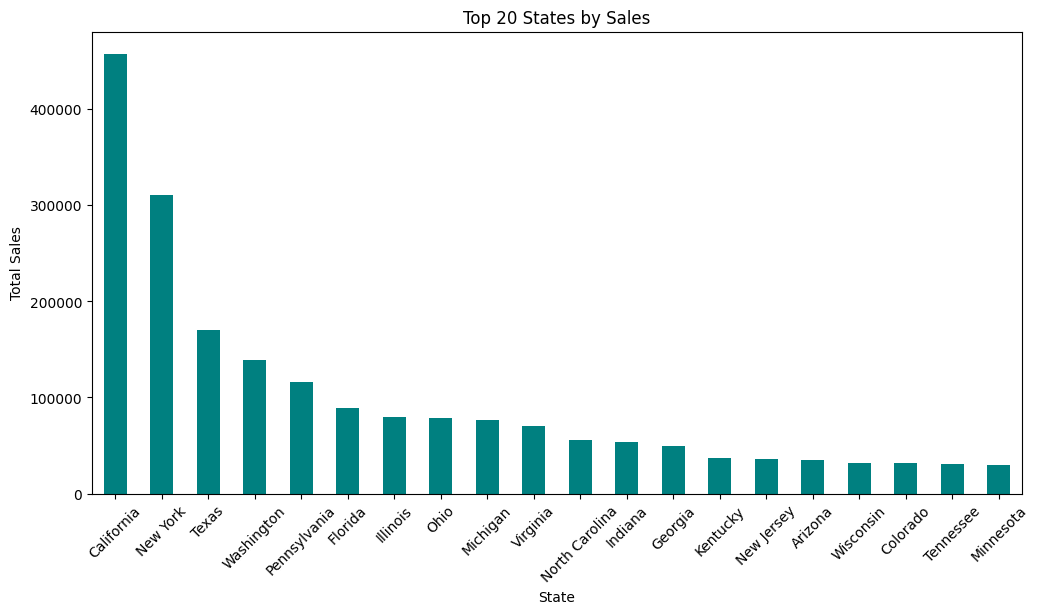

In [4]:
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
state_sales.head(20).plot(kind="bar", color="teal")
plt.title("Top 20 States by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()


                  Sales      Profit
State                              
California  457687.6315  76381.3871
New York    310876.2710  74038.5486


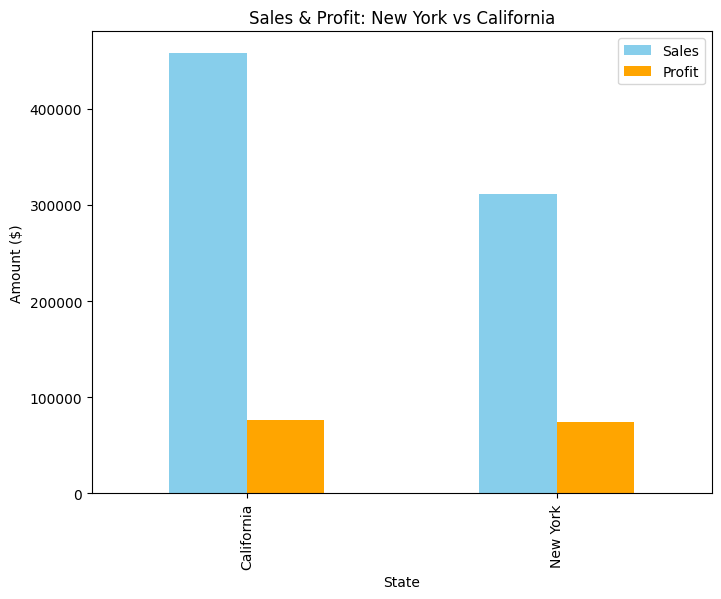

In [5]:
ny_ca = df[df["State"].isin(["New York", "California"])]
comparison = ny_ca.groupby("State")[["Sales", "Profit"]].sum()
print(comparison)

comparison.plot(kind="bar", figsize=(8,6), color=["skyblue","orange"])
plt.title("Sales & Profit: New York vs California")
plt.ylabel("Amount ($)")
plt.show()


In [6]:
ny_customers = df[df["State"]=="New York"].groupby("Customer Name")[["Sales","Profit"]].sum()
outstanding = ny_customers.sort_values("Sales", ascending=False).head(1)
print("Outstanding Customer in New York:")
print(outstanding)


Outstanding Customer in New York:
                   Sales     Profit
Customer Name                      
Tom Ashbrook   13723.498  4599.2073


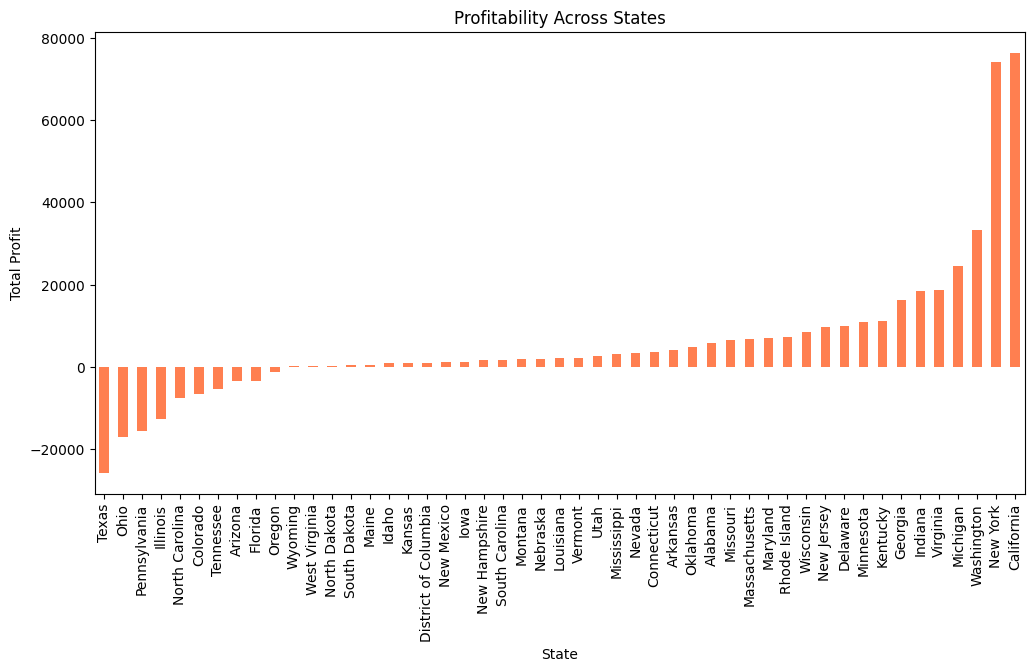

In [7]:
state_profit = df.groupby("State")["Profit"].sum().sort_values()

plt.figure(figsize=(12,6))
state_profit.plot(kind="bar", color="coral")
plt.title("Profitability Across States")
plt.ylabel("Total Profit")
plt.xticks(rotation=90)
plt.show()


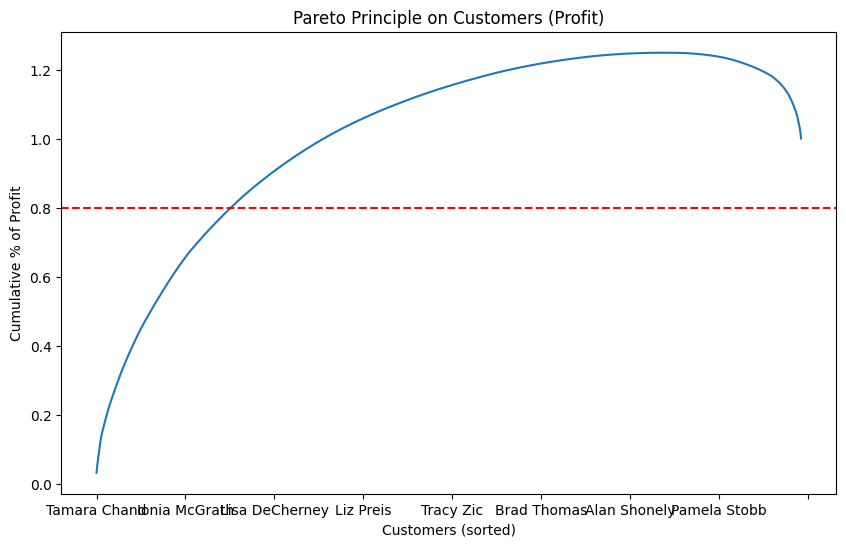

Top 152 customers (~19.2%) generate 80% of total profit


In [8]:
customer_profit = df.groupby("Customer Name")["Profit"].sum().sort_values(ascending=False)

# Cumulative contribution
cum_profit = customer_profit.cumsum()/customer_profit.sum()

plt.figure(figsize=(10,6))
cum_profit.plot()
plt.axhline(y=0.8, color="red", linestyle="--")
plt.title("Pareto Principle on Customers (Profit)")
plt.ylabel("Cumulative % of Profit")
plt.xlabel("Customers (sorted)")
plt.show()

# Percentage of customers for 80% profit
top_customers = cum_profit[cum_profit<=0.8]
print(f"Top {len(top_customers)} customers (~{len(top_customers)/len(customer_profit)*100:.1f}%) generate 80% of total profit")


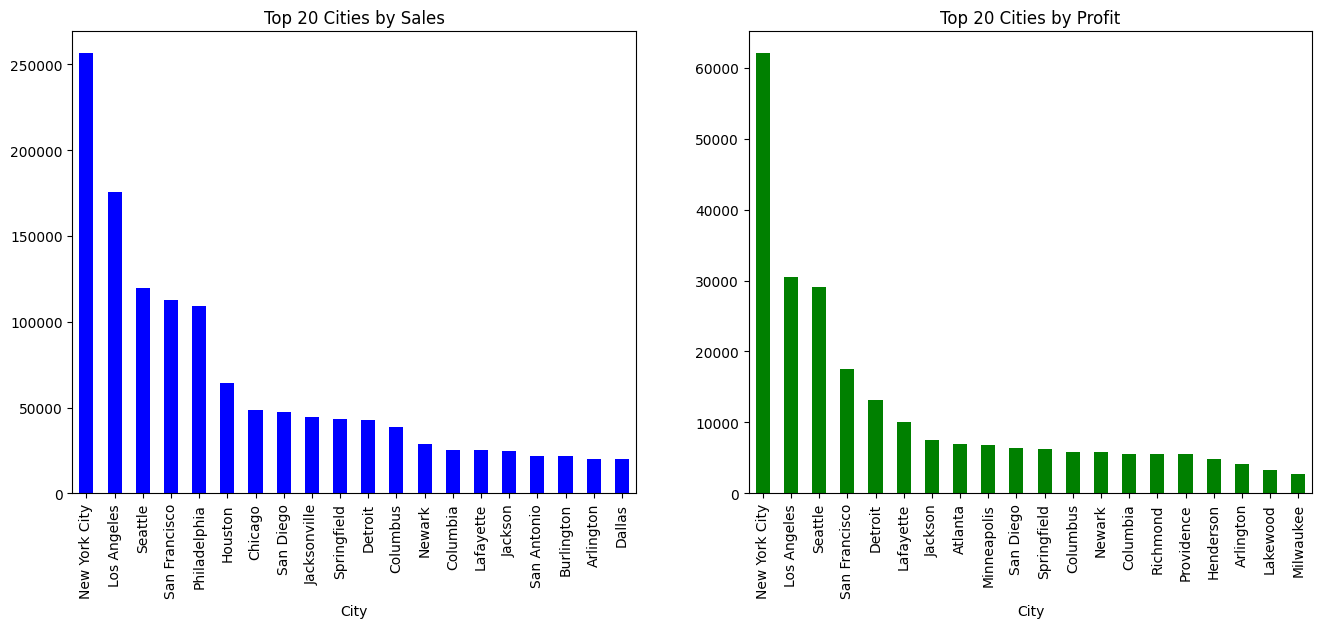

In [9]:
city_sales = df.groupby("City")["Sales"].sum().sort_values(ascending=False).head(20)
city_profit = df.groupby("City")["Profit"].sum().sort_values(ascending=False).head(20)

fig, axes = plt.subplots(1,2, figsize=(16,6))
city_sales.plot(kind="bar", ax=axes[0], color="blue", title="Top 20 Cities by Sales")
city_profit.plot(kind="bar", ax=axes[1], color="green", title="Top 20 Cities by Profit")
plt.show()


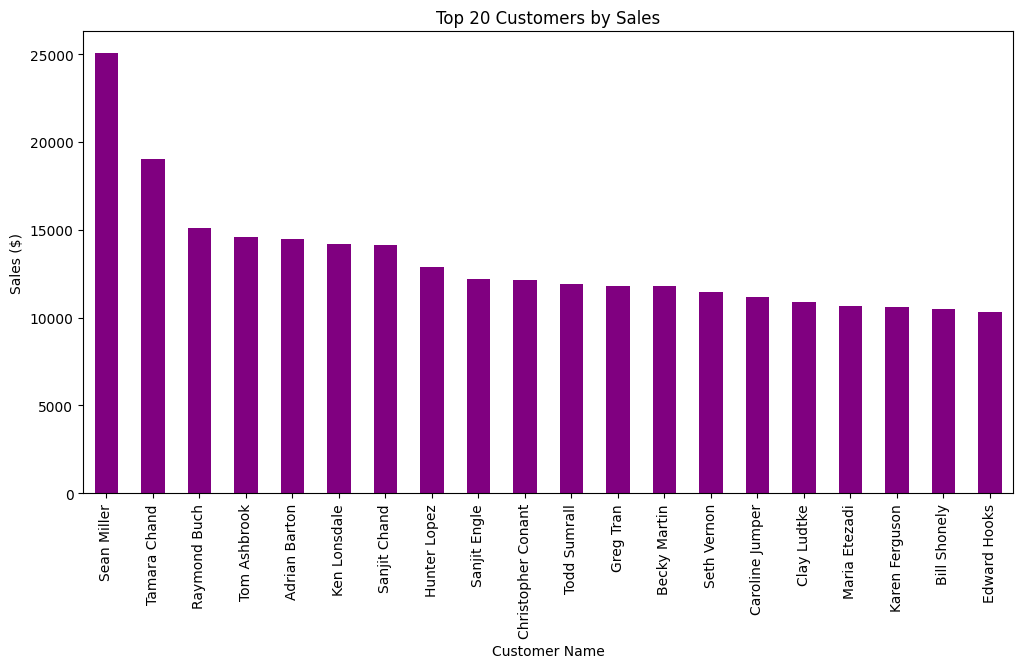

In [10]:
top_customers_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
top_customers_sales.plot(kind="bar", color="purple")
plt.title("Top 20 Customers by Sales")
plt.ylabel("Sales ($)")
plt.show()


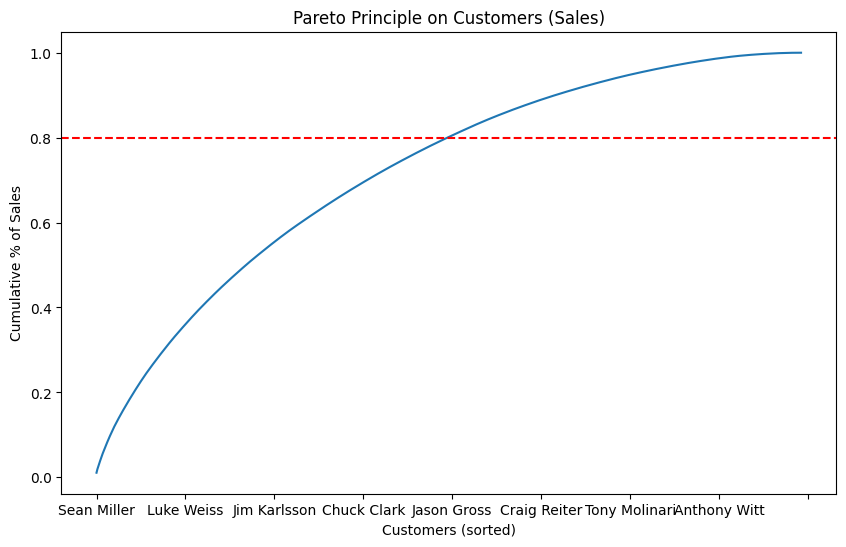

Top 395 customers (~49.8%) generate 80% of total sales


In [11]:
customer_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False)
cum_sales = customer_sales.cumsum()/customer_sales.sum()

plt.figure(figsize=(10,6))
cum_sales.plot()
plt.axhline(y=0.8, color="red", linestyle="--")
plt.title("Pareto Principle on Customers (Sales)")
plt.ylabel("Cumulative % of Sales")
plt.xlabel("Customers (sorted)")
plt.show()

# Percentage of customers for 80% sales
top_sales_customers = cum_sales[cum_sales<=0.8]
print(f"Top {len(top_sales_customers)} customers (~{len(top_sales_customers)/len(customer_sales)*100:.1f}%) generate 80% of total sales")


# 🎯 Marketing Strategy Insights

- **Top States**: California and New York dominate sales, but California yields higher profit.
- **Customer Analysis**: A few customers in New York drive disproportionate revenue → focus marketing loyalty on them.
- **Profitability**: Some states show negative profits despite high sales → re-evaluate discounts or shipping costs.
- **Pareto Principle**: Roughly 20% of customers contribute to ~80% of profit and sales → prioritize them for retention strategies.
- **Cities**: Top 20 cities differ when looking at sales vs profit. Some high-sales cities are less profitable → focus marketing on profitable hubs.
- **Recommendation**: Prioritize California, New York, and top profitable cities. Apply differentiated strategies for loss-making states.
